# Pandas für Zeitreihenanalyse
## Beispiel Seismische Daten - Bestimmung der Wiederholrate

### Motivation

Gibt es einen Zusammenhang zwischen Gasförderung und Erdbeben?

Literatur: http://www.nature.com/news/energy-production-causes-big-us-earthquakes-1.13372

### Daten
Datenquelle: U.S. Geological Survey http://earthquake.usgs.gov/earthquakes/search/ 

Region: US-Bundesstaat Oklahamo

Andere Datenquellen: [GEOFON](http://geofon.gfz-potsdam.de/) (Archiv in Potsdam)

### Methode

 * Bestimmung der zeitlichen Abstände zwischen zwei Erdbeben der Stärke 3. 
 * Berechnung der Wiederholperiode aus aufeinanderfolgenden Ereignissen. 

Inspirationsquelle für die folgende Datenanalyse: https://tamino.wordpress.com/2015/04/24/oklahoma-not-ok/

# Beispiel Python-Code

## Einlesen

Importieren des Pandas-Moduls, Einlesen, Umsortieren und Darstellen des Tabellenkopfes.

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
d=pd.read_csv("oklahoma_usgs.csv",parse_dates=[0]) # Einlesen
d=d[::-1] # Umsortieren: älteste Daten an den Anfang 
d.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
5364,1974-12-16 02:30:21.400,35.330,-97.480,10,2.6,ml,NaN,NaN,NaN,NaN,...,2014-11-06T23:21:27.851Z,"Oklahoma City urban area, Oklahoma",earthquake,NaN,NaN,NaN,NaN,reviewed,m,tul
5363,1980-11-02 10:00:49.300,35.472,-97.777,8,3.0,NaN,NaN,NaN,NaN,NaN,...,2014-11-06T23:24:27.049Z,Oklahoma,earthquake,NaN,NaN,NaN,NaN,reviewed,g,tul
5362,1981-07-11 21:09:22.540,34.884,-97.677,5,3.5,mblg,NaN,NaN,NaN,NaN,...,2014-11-07T00:29:46.469Z,Oklahoma,earthquake,NaN,NaN,NaN,NaN,reviewed,tul,tul
5361,1984-01-06 17:14:49.800,36.160,-95.580,5,2.6,md,NaN,NaN,NaN,NaN,...,2014-11-07T00:34:21.755Z,Oklahoma,earthquake,NaN,NaN,NaN,NaN,reviewed,tul,tul
5360,1984-03-03 11:42:02.400,35.510,-96.300,5,2.6,mblg,NaN,NaN,NaN,NaN,...,2014-11-07T00:34:35.307Z,Oklahoma,earthquake,NaN,NaN,NaN,NaN,reviewed,tul,tul


## Pandas Zeitserien-Objekte

Ein Pandas-Zeitserien-Objekt besteht aus Werten und einem (Zeit-)Index. Der Index ermöglicht eine einfache Weiterbearbeitung.

In [3]:
E=pd.Series(d['mag'].values,index=d['time']) # Generiere Zeitserienobjekt 
E.head()

time
1974-12-16 02:30:21.400    2.6
1980-11-02 10:00:49.300    3.0
1981-07-11 21:09:22.540    3.5
1984-01-06 17:14:49.800    2.6
1984-03-03 11:42:02.400    2.6
dtype: float64

In [4]:
P=E['1980':'1984'] # Selektiere Zeitraum
P=P[P.values>=3.0] # Nur Ereignisse >= 3
P

time
1980-11-02 10:00:49.300    3.0
1981-07-11 21:09:22.540    3.5
dtype: float64

In [5]:
dt=P.index[1]-P.index[0] # Zeitliche Differenz aus dem Index 
#ergibt eine datetime.timedelta-Objekt
dt.days # Uns interessieren nur die Tage

251

## Das vollständige Programm

Einlesen, Berechnung, Darstellen in weniger als 20 Zeilen.

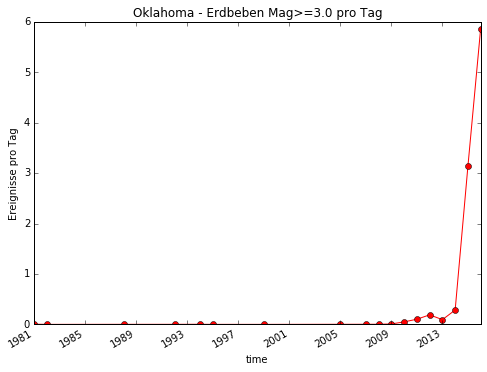

In [6]:
#Einlesen
d=pd.read_csv("oklahoma_usgs.csv",parse_dates=[0]) # Einlesen 
d=d[::-1] #Umsortieren
E=pd.Series(d['mag'].values,index=d['time'])

# Berechnung
Mag=3.0
E=E[E.values>=Mag]
E1, E2=E.index[1:], E.index[:-1]
dt = [(E1[i]-E2[i]).days for i in range(len(E1))] # -> List comprehension!
DT=pd.Series(dt,index=E2) # Generiere neues Zeitserienobjekt aus Zeitdifferenzen
DT_mean=DT.resample('A-DEC',how='mean').dropna() # Annual Mean bis Dezember / entferne NaN
F=1/DT_mean # Frequenz bzw. Wiederholrate

# Darstellen
figure(1,figsize=(8,6))
F['1975':'2015'].plot(style='ro-')
title('Oklahoma - Erdbeben Mag>='+str(Mag)+' pro Tag')
ylabel('Ereignisse pro Tag')

## Octave-Version 

Datumsfunktionen und Zeitserienobjekte sind in Octave/Matlab so wie oben nicht verfügbar. Die Umsetzung der obigen Methode bleibt als Übung.

In [21]:
d=csvread("oklahoma_usgs.csv");

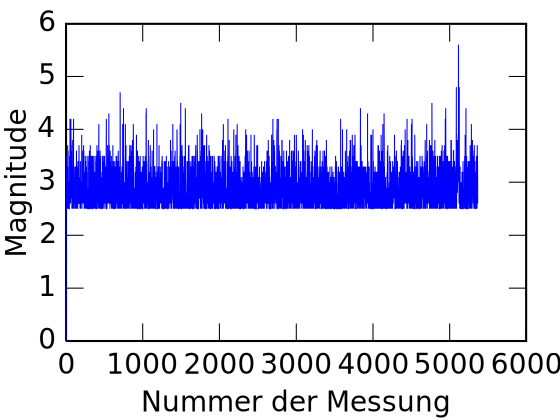

In [4]:
plot(d(:,5));
xlabel('Nummer der Messung');
ylabel('Magnitude');

In [23]:
m=d(2:5366,5);

In [13]:
size(m)

ans =

   5366      1



In [24]:
unique(m)

ans =

   2.5000
   2.6000
   2.7000
   2.8000
   2.9000
   3.0000
   3.1000
   3.2000
   3.3000
   3.4000
   3.5000
   3.6000
   3.7000
   3.8000
   3.9000
   4.0000
   4.1000
   4.2000
   4.3000
   4.4000
   4.5000
   4.7000
   4.8000
   5.6000



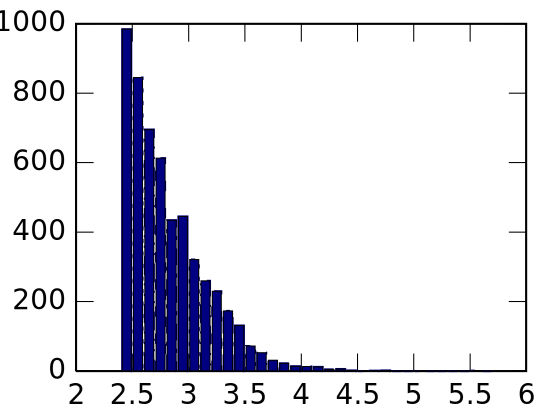

In [29]:
hb=2.45:0.1:5.65;
hist(m,hb)